In [1]:
###### Machine Learning Model######

#___________________________________________

In [3]:
import pandas as pd
import numpy as np
TitanicSurvival=pd.read_pickle('Titanicsurvival.pkl')


In [4]:
TitanicSurvival.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [8]:
TargetVariable='Survived'
Predictors=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [9]:
TitanicSurvival.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [10]:
x=TitanicSurvival[Predictors].values
y=TitanicSurvival[TargetVariable].values

In [12]:
x

array([[ 3.,  1., 22., ...,  0.,  0.,  1.],
       [ 1.,  0., 38., ...,  1.,  0.,  0.],
       [ 3.,  0., 26., ...,  0.,  0.,  1.],
       ...,
       [ 3.,  0., 28., ...,  0.,  0.,  1.],
       [ 1.,  1., 26., ...,  1.,  0.,  0.],
       [ 3.,  1., 32., ...,  0.,  1.,  0.]])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=570)

In [15]:
x_train

array([[ 1.,  1., 28., ...,  0.,  0.,  1.],
       [ 1.,  1., 37., ...,  0.,  0.,  1.],
       [ 3.,  1.,  9., ...,  0.,  0.,  1.],
       ...,
       [ 3.,  0.,  8., ...,  0.,  0.,  1.],
       [ 3.,  1., 18., ...,  0.,  0.,  1.],
       [ 3.,  1., 49., ...,  0.,  0.,  1.]])

In [16]:
x_train.shape

(623, 9)

In [17]:
#### Logistic Regression####

#____________________________________________

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr=LogisticRegression()

In [20]:
regmodel=lr.fit(x_train,y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
Prediction=regmodel.predict(x_test)

In [23]:
from sklearn import metrics
print(metrics.classification_report(y_test, Prediction))
print(metrics.confusion_matrix(y_test, Prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, Prediction).split()[-2]
print('Accuracy of the model:', F1_Score)


              precision    recall  f1-score   support

           0       0.81      0.92      0.86       155
           1       0.87      0.70      0.77       113

    accuracy                           0.83       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.83      0.83      0.82       268

[[143  12]
 [ 34  79]]
Accuracy of the model: 0.82


In [26]:
trainresults=pd.DataFrame(data=x_test,columns=Predictors)
trainresults[TargetVariable]=y_test
trainresults['predicted_survived']=Prediction

In [27]:
trainresults.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived,predicted_survived
0,2.0,0.0,22.0,1.0,1.0,29.0000,0.0,0.0,1.0,1,1
1,1.0,1.0,62.0,0.0,0.0,26.5500,0.0,0.0,1.0,0,0
2,2.0,0.0,22.0,1.0,2.0,41.5792,1.0,0.0,0.0,1,1
3,3.0,1.0,28.5,0.0,0.0,16.1000,0.0,0.0,1.0,0,0
4,3.0,1.0,2.0,3.0,1.0,21.0750,0.0,0.0,1.0,0,0


In [28]:
###### Decision Tree#####

#__________________________________________-

In [74]:
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')


In [75]:
regmodel1=clf.fit(x_train,y_train)

In [76]:
Prediction1=regmodel1.predict(x_test)

In [77]:
from sklearn import metrics
print(metrics.classification_report(y_test, Prediction1))
print(metrics.confusion_matrix(y_test, Prediction1))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, Prediction1).split()[-2]
print('Accuracy of the model:', F1_Score)


              precision    recall  f1-score   support

           0       0.74      0.97      0.84       155
           1       0.94      0.52      0.67       113

    accuracy                           0.78       268
   macro avg       0.84      0.75      0.75       268
weighted avg       0.82      0.78      0.77       268

[[151   4]
 [ 54  59]]
Accuracy of the model: 0.77


In [78]:
trainresults1=pd.DataFrame(data=x_test,columns=Predictors)
trainresults1[TargetVariable]=y_test
trainresults1['predicted_survived']=Prediction1

In [79]:
trainresults1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived,predicted_survived
0,2.0,0.0,22.0,1.0,1.0,29.0000,0.0,0.0,1.0,1,1
1,1.0,1.0,62.0,0.0,0.0,26.5500,0.0,0.0,1.0,0,0
2,2.0,0.0,22.0,1.0,2.0,41.5792,1.0,0.0,0.0,1,1
3,3.0,1.0,28.5,0.0,0.0,16.1000,0.0,0.0,1.0,0,0
4,3.0,1.0,2.0,3.0,1.0,21.0750,0.0,0.0,1.0,0,1


In [80]:
!pip install dtreeplt

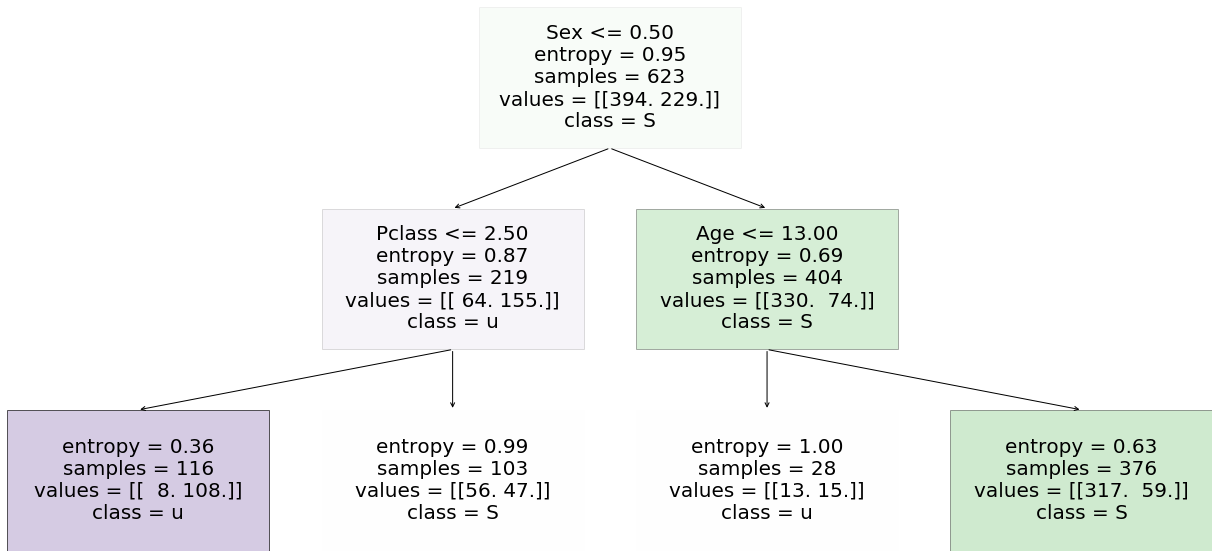

In [82]:
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

In [37]:
####### Random Forest########

#______________________________________________

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf=RandomForestClassifier(max_depth=3,n_estimators=200,criterion='entropy')

In [44]:
regmodel2=rf.fit(x_train,y_train)

In [45]:
Prediction2=regmodel2.predict(x_test)

In [46]:
from sklearn import metrics
print(metrics.classification_report(y_test, Prediction2))
print(metrics.confusion_matrix(y_test, Prediction2))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, Prediction2).split()[-2]
print('Accuracy of the model:', F1_Score)


              precision    recall  f1-score   support

           0       0.79      0.97      0.87       155
           1       0.94      0.64      0.76       113

    accuracy                           0.83       268
   macro avg       0.86      0.80      0.81       268
weighted avg       0.85      0.83      0.82       268

[[150   5]
 [ 41  72]]
Accuracy of the model: 0.82


In [47]:
trainresults2=pd.DataFrame(data=x_test,columns=Predictors)
trainresults2[TargetVariable]=y_test
trainresults2['predicted_survived']=Prediction2

In [48]:
trainresults2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived,predicted_survived
0,2.0,0.0,22.0,1.0,1.0,29.0000,0.0,0.0,1.0,1,1
1,1.0,1.0,62.0,0.0,0.0,26.5500,0.0,0.0,1.0,0,0
2,2.0,0.0,22.0,1.0,2.0,41.5792,1.0,0.0,0.0,1,1
3,3.0,1.0,28.5,0.0,0.0,16.1000,0.0,0.0,1.0,0,0
4,3.0,1.0,2.0,3.0,1.0,21.0750,0.0,0.0,1.0,0,0


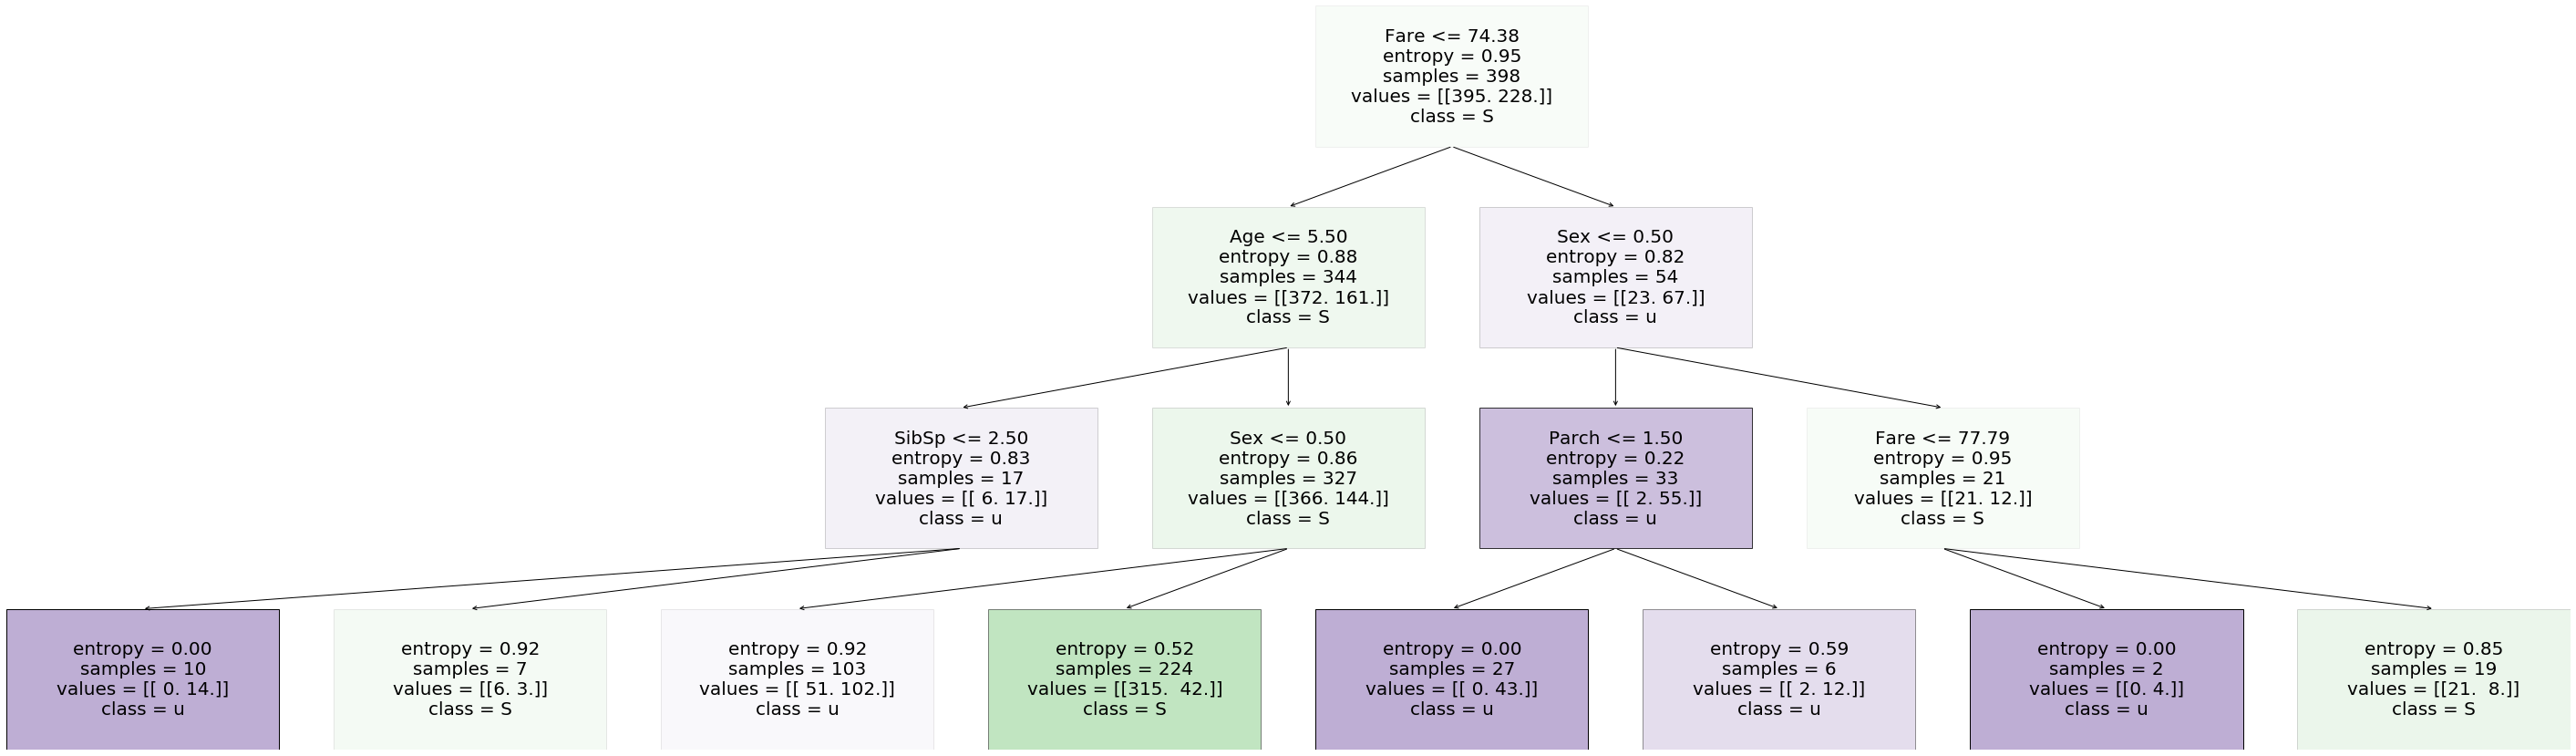

In [83]:
from dtreeplt import dtreeplt
dtree = dtreeplt(model=rf.estimators_[10], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

In [49]:
#### AdaBoost#####

#_________________________________________________

In [87]:
from sklearn.ensemble import AdaBoostClassifier

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
dtc=DecisionTreeClassifier(max_depth=1)

In [90]:
ar=AdaBoostClassifier(n_estimators=50,base_estimator=dtc,learning_rate=1)

In [91]:
regmodel3=ar.fit(x_train,y_train)

In [92]:
Prediction3=regmodel3.predict(x_test)

In [93]:
from sklearn import metrics
print(metrics.classification_report(y_test, Prediction3))
print(metrics.confusion_matrix(y_test, Prediction3))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, Prediction3).split()[-2]
print('Accuracy of the model:', F1_Score)


              precision    recall  f1-score   support

           0       0.84      0.86      0.85       155
           1       0.81      0.77      0.79       113

    accuracy                           0.82       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.82      0.82      0.82       268

[[134  21]
 [ 26  87]]
Accuracy of the model: 0.82


In [94]:
trainresults3=pd.DataFrame(data=x_test,columns=Predictors)
trainresults3[TargetVariable]=y_test
trainresults3['predicted_survived']=Prediction3

In [95]:
trainresults3.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived,predicted_survived
0,2.0,0.0,22.0,1.0,1.0,29.0000,0.0,0.0,1.0,1,1
1,1.0,1.0,62.0,0.0,0.0,26.5500,0.0,0.0,1.0,0,1
2,2.0,0.0,22.0,1.0,2.0,41.5792,1.0,0.0,0.0,1,1
3,3.0,1.0,28.5,0.0,0.0,16.1000,0.0,0.0,1.0,0,0
4,3.0,1.0,2.0,3.0,1.0,21.0750,0.0,0.0,1.0,0,0


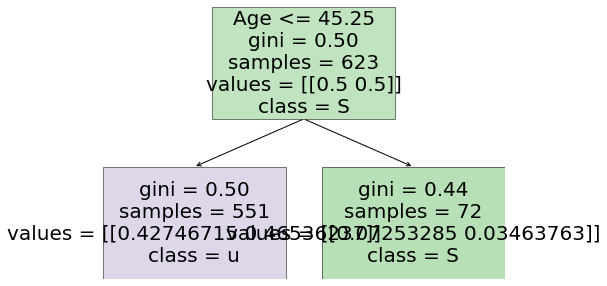

In [97]:
from dtreeplt import dtreeplt
dtree = dtreeplt(model=ar.estimators_[6], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

In [102]:
####XgBoost#####

#_________________________________________________

In [62]:
from xgboost import XGBClassifier

In [63]:
xg=XGBClassifier(max_depth=2, learning_rate=0.01, n_estimators=400, objective='binary:logistic', booster='gbtree')

In [64]:
regmodel4=xg.fit(x_train,y_train)

C:\Users\USER\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:43:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [65]:
Prediction4=regmodel4.predict(x_test)

In [66]:
from sklearn import metrics
print(metrics.classification_report(y_test, Prediction4))
print(metrics.confusion_matrix(y_test, Prediction4))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, Prediction4).split()[-2]
print('Accuracy of the model:', F1_Score)


              precision    recall  f1-score   support

           0       0.79      0.95      0.86       155
           1       0.91      0.65      0.76       113

    accuracy                           0.82       268
   macro avg       0.85      0.80      0.81       268
weighted avg       0.84      0.82      0.82       268

[[148   7]
 [ 40  73]]
Accuracy of the model: 0.82


In [67]:
trainresults4=pd.DataFrame(data=x_test,columns=Predictors)
trainresults4[TargetVariable]=y_test
trainresults4['predicted_survived']=Prediction4

In [68]:
trainresults4.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived,predicted_survived
0,2.0,0.0,22.0,1.0,1.0,29.0000,0.0,0.0,1.0,1,1
1,1.0,1.0,62.0,0.0,0.0,26.5500,0.0,0.0,1.0,0,0
2,2.0,0.0,22.0,1.0,2.0,41.5792,1.0,0.0,0.0,1,1
3,3.0,1.0,28.5,0.0,0.0,16.1000,0.0,0.0,1.0,0,0
4,3.0,1.0,2.0,3.0,1.0,21.0750,0.0,0.0,1.0,0,0


In [103]:
#####Svm##########

#_________________________________________

In [104]:
from sklearn import svm

In [109]:
clf=svm.SVC(C=20,kernel='rbf',gamma=0.01)

In [110]:
regmodel5=clf.fit(x_train,y_train)

In [111]:
Prediction5=regmodel5.predict(x_test)

In [112]:
from sklearn import metrics
print(metrics.classification_report(y_test, Prediction5))
print(metrics.confusion_matrix(y_test, Prediction5))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, Prediction5).split()[-2]
print('Accuracy of the model:', F1_Score)


              precision    recall  f1-score   support

           0       0.81      0.84      0.83       155
           1       0.77      0.73      0.75       113

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268

[[130  25]
 [ 30  83]]
Accuracy of the model: 0.79


In [113]:
trainresults5=pd.DataFrame(data=x_test,columns=Predictors)
trainresults5[TargetVariable]=y_test
trainresults5['predicted_survived']=Prediction5

In [114]:
trainresults5.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived,predicted_survived
0,2.0,0.0,22.0,1.0,1.0,29.0000,0.0,0.0,1.0,1,1
1,1.0,1.0,62.0,0.0,0.0,26.5500,0.0,0.0,1.0,0,0
2,2.0,0.0,22.0,1.0,2.0,41.5792,1.0,0.0,0.0,1,1
3,3.0,1.0,28.5,0.0,0.0,16.1000,0.0,0.0,1.0,0,0
4,3.0,1.0,2.0,3.0,1.0,21.0750,0.0,0.0,1.0,0,0
